In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
#print('Class labels', np.unique(df_wine['Class label']))

In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1.	載入「葡萄酒數據集」，並將其分為70%訓練，30%測試(random_state =0)

In [4]:
from sklearn.cross_validation import train_test_split

#split train70%, test30% data
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values #.iloc[:, 1:]也就是1:14
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Users/JackChang/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


2.	將數據標準化

In [5]:
#standardization
from sklearn.preprocessing import StandardScaler

In [6]:
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 3.	PCA 降維 ( k = 2)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

4.	利用邏輯回歸(logistic regression)做分類

In [9]:
from sklearn.linear_model import LogisticRegression

train

In [10]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_pca, y_train)

print(lr.coef_ )
print(lr.intercept_ )

[[ 2.34684386 -2.32475117]
 [ 0.09050576  5.00047297]
 [-2.67317917 -3.50360868]]
[-2.62261109 -1.80480538 -4.12999105]


test

In [11]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_test_pca, y_test)

print(lr.coef_ )
print(lr.intercept_ )

[[ 5.15525206 -3.71968903]
 [-0.21140222  6.39263518]
 [-3.74874972 -3.939108  ]]
[-7.55465217 -1.2970599  -6.22307735]


predict

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

In [14]:
lr_pca_train = accuracy_score(y_train, y_train_pred)
lr_pca_test = accuracy_score(y_test, y_test_pred)

print('PCA train/test accuracies %.3f/%.3f' 
      %(lr_pca_train, lr_pca_test))

PCA train/test accuracies 0.952/1.000


# 5.	分別對訓練集和測試集畫出PCA決策區域圖

In [15]:
#畫出散佈圖及決策邊界
#chose colors
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

train

(-3.8815078608342164, 4.858492139165791)

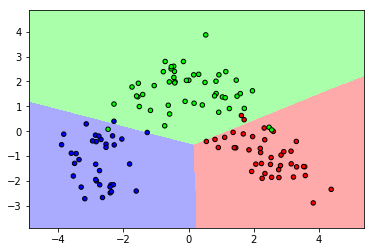

In [16]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
#依據顏色分類
Z = Z.reshape(xx.shape)
#畫出散佈圖
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

test

(-4.458848243609101, 4.281151756390713)

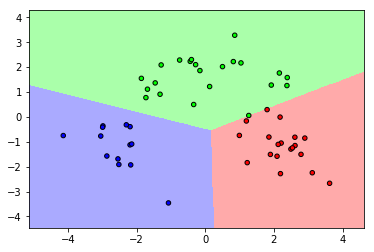

In [17]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
#依據顏色分類
Z = Z.reshape(xx.shape)
#畫出散佈圖
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 3. LDA降維(k=2)

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [19]:
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

4.   邏輯回歸(logisticregression)做分類

In [20]:
from sklearn.linear_model import LogisticRegression

train

In [21]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_lda, y_train)

print(lr.coef_ )
print(lr.intercept_ )

[[-3.59802977  4.37394403]
 [ 0.07063124 -6.44329069]
 [ 3.35104226  4.76471325]]
[-4.10633592 -1.59756102 -6.92179522]


test

In [22]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_test_lda, y_test)

print(lr.coef_ )
print(lr.intercept_ )

[[-3.65528989  5.82488049]
 [ 1.09721068 -7.69055142]
 [ 2.30802054  2.90959219]]
[-5.13884874 -2.39022279 -5.18699949]


predict

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_train_pred = lr.predict(X_train_lda)
y_test_pred = lr.predict(X_test_lda)

In [25]:
lr_lda_train = accuracy_score(y_train, y_train_pred)
lr_lda_test = accuracy_score(y_test, y_test_pred)

print('LDA train/test accuracies %.3f/%.3f' 
      %(lr_lda_train, lr_lda_test))

LDA train/test accuracies 1.000/1.000


# 5. 分別對訓練集和測試集畫出LDA決策區域圖

In [26]:
#畫出散佈圖及決策邊界
#chose colors
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

train

(-6.5806808633045275, 4.759319136695231)

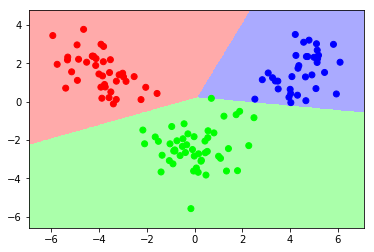

In [27]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
#依據顏色分類
Z = Z.reshape(xx.shape)
#畫出散佈圖
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

test

(-5.570130383926184, 4.829869616073594)

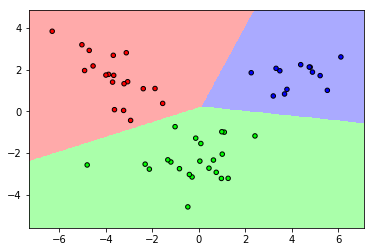

In [28]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_test_lda[:, 0].min() - 1, X_test_lda[:, 0].max() + 1
y_min, y_max = X_test_lda[:, 1].min() - 1, X_test_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))

Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
#依據顏色分類
Z = Z.reshape(xx.shape)
#畫出散佈圖
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test_lda[:,0], X_test_lda[:,1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())